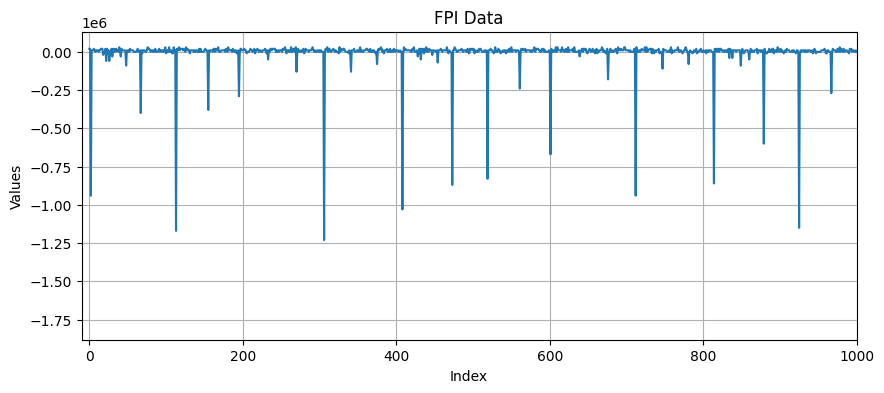

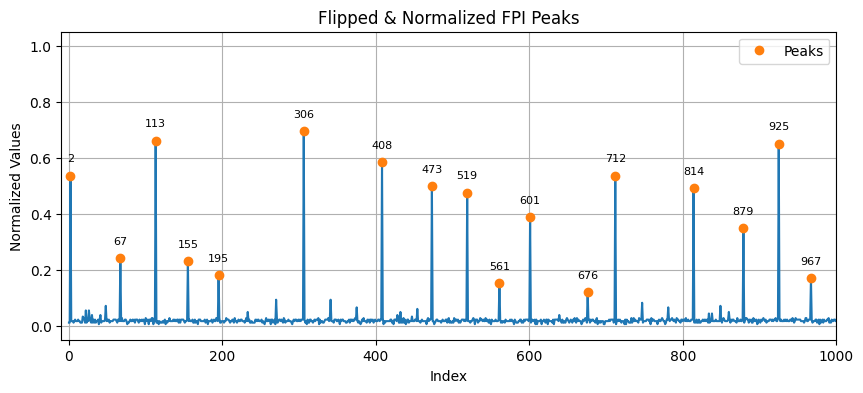

Average distance between peaks: 52.97402597402598


In [29]:
# plot csv file
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks
import numpy as np

# Load the CSV file
data = pd.read_csv(r'4\102mA\Broad.csv')

# Clean the column names by removing commas
data.columns = [col.replace(',', '') for col in data.columns]

# Convert the data to numeric values (removing commas in data)
data = data.replace({',': ''}, regex=True).apply(pd.to_numeric)

# Select the series with column name '20000'
series_column = '10000.1'
series_data = data[series_column]
limit = 1000

# Plot the original series
plt.figure(figsize=(10, 4))
plt.plot(series_data)
plt.xlabel('Index')
plt.ylabel('Values')
plt.title(f'FPI Data')
plt.grid(True)
plt.xlim(-10, limit)
plt.show()

# Flip the data about the x-axis
flipped_series_data = -series_data

# Normalize the flipped data
normalized_flipped_series_data = (flipped_series_data - flipped_series_data.min()) / (flipped_series_data.max() - flipped_series_data.min())

# Find peaks in the flipped normalized series
peaks, _ = find_peaks(normalized_flipped_series_data, height = 0.1)

# Calculate distances between consecutive peaks
peak_distances = np.diff(peaks)

# Plot the flipped normalized series with peaks highlighted
plt.figure(figsize=(10, 4))
plt.plot(normalized_flipped_series_data)
plt.plot(peaks, normalized_flipped_series_data[peaks], 'o', label='Peaks')
plt.xlabel('Index')
plt.ylabel('Normalized Values')
plt.title(f'Flipped & Normalized FPI Peaks')

# Annotate the peaks
for peak in peaks:
    plt.annotate(peak, (peak, normalized_flipped_series_data[peak]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, rotation=0)

plt.legend()
plt.grid(True)
plt.xlim(-10,limit)
plt.show()

# Compute the average distance between peaks
average_peak_distance = np.mean(peak_distances)


print(f'Average distance between peaks: {average_peak_distance}')

